# The Math of Embeddings

**Embeddings** are list of numbers, specifically array of floating point numbers, that are predictions from a model that has been trained to represent high-dimentional data (text, images, video, audio) into a lower-dimensional space.  This evectively captures semantic meaning and structural relationships.

The lists of floats are **vector spaces** where each number, a feature, represents a latent feature.

Mathemtical operations on the embeddings are used to calculate **distance metrics** to measure similarity between embeddings.

The notebook workflow will introduce the math behind common distance metrics and provide intuition behind what each is measuring.

---
## Setup

### Installs (If Needed)

In [106]:
# tuples of (import name, install name, min_version)
packages = [
    ('numpy', 'numpy'),
    ('matplotlib', 'matplotlib')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### Packages

In [107]:
import numpy as np
import matplotlib.pyplot as plt

---
## Create Example Embeddings


In [5]:
embeddings = np.random.rand(1000, 2)

In [12]:
example_a = embeddings[0]
example_b = embeddings[-1]

In [13]:
example_a, example_b

(array([0.71395259, 0.45081254]), array([0.52904412, 0.26408864]))

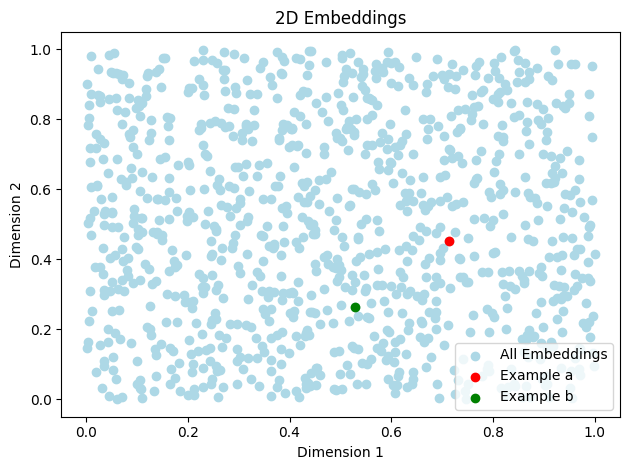

In [22]:
# Create a scatter plot of all embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], color='lightblue', label='All Embeddings')

# Plot the two examples with different colors
plt.scatter(example_a[0], example_a[1], color='red', label='Example a')
plt.scatter(example_b[0], example_b[1], color='green', label='Example b')

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
## Embeddings Are Vectors

The two example embeddings can be plotted as vectors with origin (0,0):


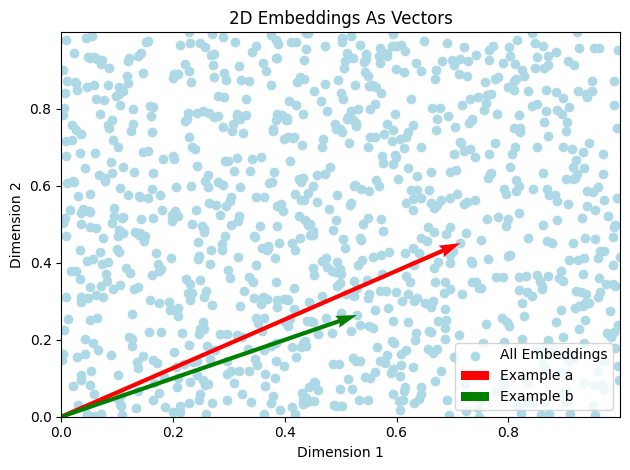

In [51]:
# Create a scatter plot of all embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1], color='lightblue', label='All Embeddings')

# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')
plt.quiver(0, 0, example_b[0], example_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Example b')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings[:, 0]))
plt.ylim(0, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings As Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
## Magnitude of Vectors (aka norms)

> Learning a bit about vector math can be very helpful here!  Let's keep it light and geometrically motivated.

When we think magnitude and see a line like the red and green ones for our example vectors we think **length**.  Turns out that is a great way to think about it.  But remember, the line represent out vector (an embedding) and could have many more dimensions than we can visualize.  Beyond two dimensions the distance could be a bit more complex to think about.  This section will show the most common norms, their calcuations, and visual represent them for stronger intuition.  

A tiny bit of notation.  A norm of a value is represent by what appears to be double absolute value signs, for instance the norm for a vector a would be notated as: $||a||$.  Extending this a bit is the inclusion of the type of norm with subscript value like: $||a||_2$

Read more about [norms](https://en.wikipedia.org/wiki/Norm_(mathematics))

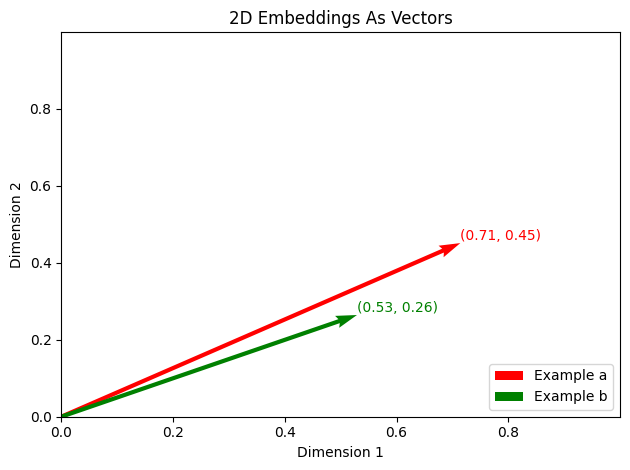

In [97]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')
plt.quiver(0, 0, example_b[0], example_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Example b')

# Annotate the ends of the vectors with their coordinates
plt.text(example_a[0], example_a[1], f"({example_a[0]:.2f}, {example_a[1]:.2f})", color='red', ha='left', va='bottom')
plt.text(example_b[0], example_b[1], f"({example_b[0]:.2f}, {example_b[1]:.2f})", color='green', ha='left', va='bottom')


# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings[:, 0]))
plt.ylim(0, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings As Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

### Euclidean Norm (L2 norm)

The Euclidean norm, or L2 norm, is the straight line distance: notated as $||a||_2$. Distance is calculated by taking the square root of the sum of squared coordinates.  In math that looks like:

$$
||a||_2 = \sqrt{\sum_{i=0}^{n} (a_i)^2} = \sqrt{(a_0)^2 + (a_1)^2 + ... (a_n)^2}
$$

Now let's calculate this for `example_a` in three difference ways:
- manually
- brute force
- with a function

Review the vector for the `example_a` embedding:

In [67]:
example_a

array([0.71395259, 0.45081254])

Manually calculate the L2 norm without any vector math:

In [74]:
np.sqrt(example_a[0]**2 + example_a[1]**2)

0.8443697313870246

Calculate the L2 norm using vector math to compute the squared values by squaring the vector:

In [75]:
np.sqrt(np.sum(example_a**2))

0.8443697313870246

Use a function to directly compute the L2 norm:

In [77]:
np.linalg.norm(example_a, 2)

0.8443697313870246

### Manhattan Norm (L1 norm)

The Manhattan norm, or L1 norm, is often referred to as the taxicab norm: notated as $||a||_1$.  Rather than directly going between coordinates it uses an imaginary grid, like a city, and traverses the distance using only horizontal and vertical movements.  In other words, you sum the absolute values of each coordinate representing a distance moved.  In math that looks like:

$$
||a||_1 = \sum_{i=0}^{n} |a_i| = |a_0| + |a_1| + ... |a_n|
$$

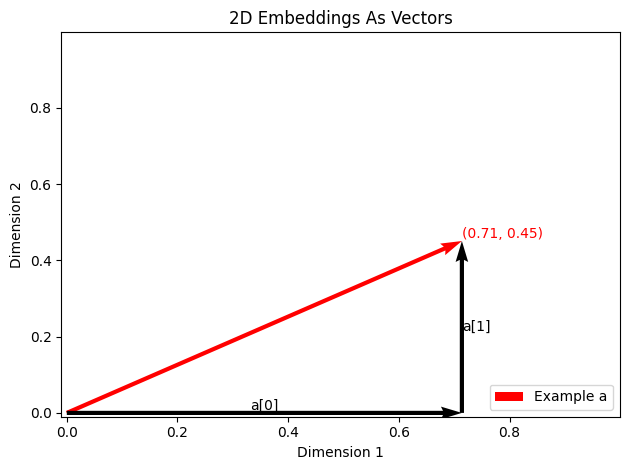

In [85]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')

# Annotate the ends of the vectors with their coordinates
plt.text(example_a[0], example_a[1], f"({example_a[0]:.2f}, {example_a[1]:.2f})", color='red', ha='left', va='bottom')

# Add a vector from the origin to example_a[0]
plt.quiver(0, 0, example_a[0], 0, angles='xy', scale_units='xy', scale=1, color='black')
plt.text(example_a[0] / 2, 0, 'a[0]', color='black', ha='center', va='bottom')
plt.quiver(example_a[0], 0, 0, example_a[1], angles='xy', scale_units='xy', scale=1, color='black')
plt.text(example_a[0], example_a[1] / 2, 'a[1]', color='black', ha='left', va='center')


# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(-0.01, max(embeddings[:, 0]))
plt.ylim(-0.01, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings As Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

Review the vector for the `example_a` embedding:

In [86]:
example_a

array([0.71395259, 0.45081254])

Manually calculate the L1 norm without any vector math:

In [87]:
abs(example_a[0]) + abs(example_a[1])

1.1647651256280853

Calculate the L1 norm using vector math to compute the absolute values for the vector:

In [88]:
np.sum(np.abs(example_a))

1.1647651256280853

Use a function to directly compute the L1 norm:

In [89]:
np.linalg.norm(example_a, 1)

1.1647651256280853

### Maximum Norm (L&#8734; norm)

The maximum norm, or infinity norm is maximum component length of the vector: notated as $||a||_\infty$.  This represents the magnitude as the single component with the largest magnitude, or absolute value.  The math looks like:

$$
||a||_\infty = \max(|a_i|, i \in [0, n]) = \max(|a_0|, |a_1|, ..., |a_n|)
$$


Review the vector for the `example_a` embedding:

In [90]:
example_a

array([0.71395259, 0.45081254])

Manually calculate the L&#8734; norm without any vector math:

In [94]:
max([abs(example_a[0]), abs(example_a[1])])

0.7139525904474127

Calculate the L&#8734; norm using vector math to compute the absolute values for the vector:

In [95]:
np.max(np.abs(example_a))

0.7139525904474127

Use a function to directly compute the L&#8734; norm:

In [96]:
np.linalg.norm(example_a, np.inf)

0.7139525904474127

---
## Distance Measures

---
### Euclidean Distance

The **Euclidean distance** is the length of the straight-line connecting two points.  In math this looks like:

$$
d(a, b) = \sqrt{\sum_{i=0}^{n} (a_i - b_i)^2} = \sqrt{(a_0 - b_0)^2 + (a_1 - b_1)^2 + ... (a_n - b_n)^2}
$$

Remember the section above about magnitudes, aka norms?  Well the L2 norm has a similar name: Euclidean Norm.  That is not just a coincidence as we can directly use L2 norm to calculate this rather than this longer form calculation!

$$
d = a - b
$$

$$
||d||_2 = \sqrt{\sum_{i=0}^{n} (d_i)^2} = \sqrt{(d_0)^2 + (d_1)^2 + ... (d_n)^2}
$$


Read more about [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

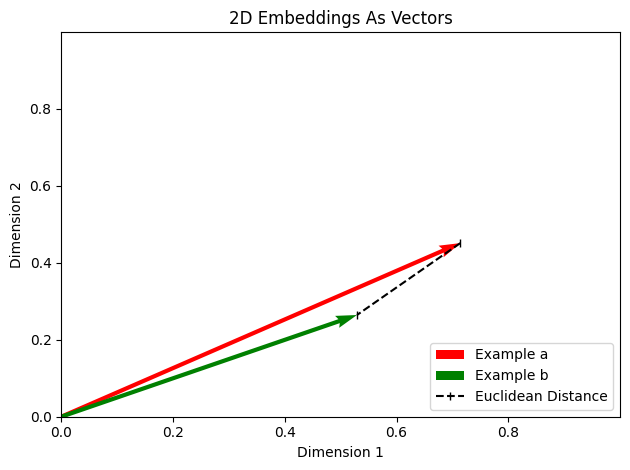

In [120]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')
plt.quiver(0, 0, example_b[0], example_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Example b')

# Draw a line connecting the two examples with ends indicating distance
plt.plot([example_a[0], example_b[0]], [example_a[1], example_b[1]], linestyle='--', marker='|', color='black', label='Euclidean Distance')

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings[:, 0]))
plt.ylim(0, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embeddings As Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

Calculate the distance vector:

In [110]:
distance = example_a - example_b
distance

array([0.18490847, 0.1867239 ])

Calculate the Euclidean distance directly:

In [111]:
euclidean_distance = np.sqrt(np.sum((distance)**2))
euclidean_distance

0.2627869041125236

Calculate the Euclidean distance as the L2 Norm:

In [112]:
euclidean_distance = np.linalg.norm(distance, 2)
euclidean_distance

0.2627869041125236

---
### Dot Product Similarity

The **dot product** is a similarity metric for two vectors, in our case embeddings.  This metrics adds the product (multiplication) of each component of the vectors.  In math that looks like:

$$
a \cdot b = \sum_{i=0}^{n} a_i b_i = a_0 b_0 + a_1 b_1 + ... + a_n b_n
$$

Actually, the **dot product** is geometrically represented by the product of the magnitudes of each vectors multiplied by the cosine of the angle between them:

$$
a \cdot b = ||a||_2 ||b||_2 \cos(\alpha)
$$


The values are intuitive:
- When $\alpha < 90$ dot product is > 0
- When $\alpha = 90$ dot product is 0
- When $\alpha > 90$ dot product is < 0


Read more about [dot product](https://en.wikipedia.org/wiki/Dot_product)

Calculate the dot product geometrically by first calculating the angle between the vectors (notice that the dot product is still needed):

In [151]:
angle = np.arccos(np.dot(example_a, example_b) / (np.linalg.norm(example_a, 2) * np.linalg.norm(example_b, 2))) # in radians
angle = np.degrees(angle)
angle

5.742139874110529

Now complete the geometric representation of the dot product:

In [152]:
dot_product = np.linalg.norm(example_a)*np.linalg.norm(example_b)*np.cos(np.radians(angle))
dot_product

0.4967668876835385

Calculate the dot product directly:

In [153]:
dot_product = np.sum([example_a[i] * example_b[i] for i in range(len(example_a))])
dot_product

0.4967668876835385

Calcuate the dot product with the `np.dot` function:

In [154]:
dot_product = np.dot(example_a, example_b)
dot_product

0.4967668876835385

---
### Cosine Similarity

The **cosine similarity** involves just the angle ($\alpha$) between two vectors. This metric is not impacted by the magnitude/size of the vectors, just the angle ($\alpha$) between them. It takes the cosine of this angle ($\alpha$) which ends up on a scale of $[-1, 1]$. That means:
- If the angle between vectors is 0: $\cos(0) = 1$
- If the angle between vectors is 180: $\cos(180) = -1$
- If the angle between vectors is 90: $\cos(90) = 0$

Recall the **dot product** calculation above contains the magnitude of both vectors and notice that this calcuation just divides that out to remove it:

$$
\text{cos_sim}(a, b) = \frac{a \cdot b}{||a||_2 \cdot ||b||_2} = \frac{||a||_2 \cdot ||b||_2 \cos(\alpha)}{||a||_2 \cdot ||b||_2} = \cos(\alpha)
$$

The angle ($\alpha$) turns out to be an bit complicated to calculate all by itself.  Recall that in the **dot product** calculation we were able to avoid it.  For that reason it is actually easiest to calulate the **cosine similarity** by first calcuating the **dot product** and then diving by the product of the norms.

Read more about [Cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)

Calculate the cosine similarity by first calculating the angle between the vectors (notice that the dot product is still needed):

In [116]:
angle = np.arccos(dot_product / (np.linalg.norm(example_a, 2) * np.linalg.norm(example_b, 2))) # in radians
angle = np.degrees(angle)
angle

5.742139874110529

In [119]:
cosine_similarity = np.cos(np.radians(angle))
cosine_similarity

0.9949822531952275

Calcualte the cosine similarity using the result of the dot product calculation:

In [118]:
cosine_similarity = dot_product / (np.linalg.norm(example_a, 2) * np.linalg.norm(example_b, 2))
cosine_similarity

0.9949822531952275

Visualize the angle between these vectors:

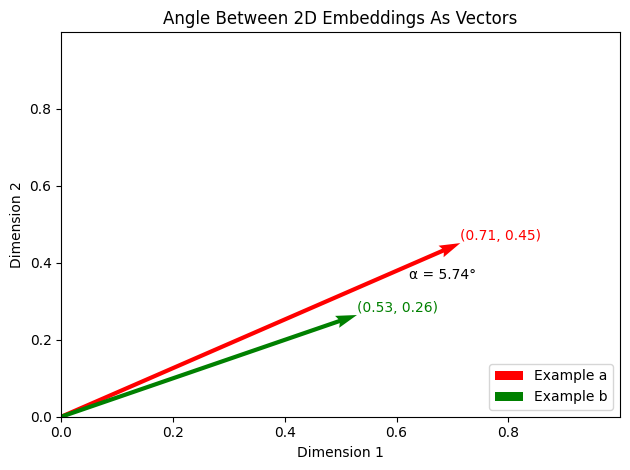

In [127]:
# Plot the two examples as vectors with arrows from the origin
plt.quiver(0, 0, example_a[0], example_a[1], angles='xy', scale_units='xy', scale=1, color='red', label='Example a')
plt.quiver(0, 0, example_b[0], example_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Example b')

# Annotate the ends of the vectors with their coordinates
plt.text(example_a[0], example_a[1], f"({example_a[0]:.2f}, {example_a[1]:.2f})", color='red', ha='left', va='bottom')
plt.text(example_b[0], example_b[1], f"({example_b[0]:.2f}, {example_b[1]:.2f})", color='green', ha='left', va='bottom')

# Annotate the angle between the vectors
plt.text((example_a[0]+example_b[0])/2, (example_a[1]+example_b[1])/2, f'\u03B1 = {angle:.2f}\u00B0', color='black') 

# Set the x and y limits to include the origin and the maximum values of the vectors
plt.xlim(0, max(embeddings[:, 0]))
plt.ylim(0, max(embeddings[:, 1]))

# Add labels and a legend
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Angle Between 2D Embeddings As Vectors')
plt.legend(loc = 'lower right')

# Adjust padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

---
## More in development

- deeper dive into intuition of the three distance measures
- compare/contrast measures + tips on picking (like if embedding was trained with a specific one then use that one)
- applying the distance measures to the full set of embeddings with visuals to guide intuition